Get 500 repos

In [36]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
def get(url, base_url='https://api.github.com/'):
    url = base_url + url

    payload={}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)

    return response.text

In [4]:
res = get('search/repositories?q=stars:>1000&per_page=100&sort=star&order=desc&page=2')
res = json.loads(res)

In [5]:
raw = []
for i in range(1, 6):
    res = get(f'search/repositories?q=stars:>1000&per_page=100&sort=star&order=desc&page={i}')
    res = json.loads(res)
    raw.extend(res['items'])

In [33]:
cols = [
    'full_name', 'num_stars', 'num_forks', 'num_watchers', 'num_open_issues', 
    'topics', 'main_language', 'created_at', 'updated_at', 'license_key'
]

data = {
    key: []
    for key in cols
}

from tqdm import tqdm 

for repo in tqdm(raw):
#     s = get(repo['languages_url'], base_url='')
#     print(s)
#     languages_dict = json.loads(s)
#     languages = ', '.join(languages_dict)
    vals = [
        repo['full_name'], 
        repo['stargazers_count'], 
        repo['forks_count'], 
        repo['watchers'],
        repo['open_issues'],
        ', '.join(repo['topics']), 
        repo['language'],
        repo['created_at'],
        repo['updated_at'],
        repo['license']['key'] if repo['license'] else None
    ]
    for col, val in zip(cols, vals):
        data[col].append(val)

100%|██████████████████████████████████████| 500/500 [00:00<00:00, 73104.61it/s]


In [34]:
df = pd.DataFrame(data)
df

,full_name,num_stars,num_forks,num_watchers,num_open_issues,topics,main_language,created_at,updated_at,license_key
0,freeCodeCamp/freeCodeCamp,357821,30534,357821,185,"careers, certification, community, curriculum,...",TypeScript,2014-12-24T17:49:19Z,2022-12-02T09:09:42Z,bsd-3-clause
1,996icu/996.ICU,264575,21490,264575,16736,,None,2019-03-26T07:31:14Z,2022-12-02T09:31:59Z,other
2,EbookFoundation/free-programming-books,257401,52749,257401,53,"books, education, hacktoberfest, list, resource",None,2013-10-11T06:50:37Z,2022-12-02T09:58:23Z,other
3,jwasham/coding-interview-university,240296,64219,240296,51,"algorithm, algorithms, coding-interview, codin...",None,2016-06-06T02:34:12Z,2022-12-02T10:03:19Z,cc-by-sa-4.0
4,sindresorhus/awesome,228350,24561,228350,53,"awesome, awesome-list, lists, resources, unicorns",None,2014-07-11T13:42:37Z,2022-12-02T09:50:03Z,cc0-1.0
...,...,...,...,...,...,...,...,...,...,...
495,composer/composer,27122,6487,27122,128,"composer, dependency-manager, hacktoberfest, p...",PHP,2011-06-08T08:53:00Z,2022-12-02T07:05:23Z,mit
496,jgm/pandoc,27102,3026,27102,884,"commonmark, converter, document, haskell, mark...",Haskell,2010-03-20T20:34:23Z,2022-12-02T09:38:33Z,other
497,tmux/tmux,27023,1829,27023,19,,C,2015-06-03T23:32:55Z,2022-12-02T09:18:41Z,other
498,PaddlePaddle/PaddleOCR,26997,5517,26997,1315,"chineseocr, crnn, db, ocr, ocrlite",Python,2020-05-08T10:38:16Z,2022-12-02T09:14:32Z,apache-2.0


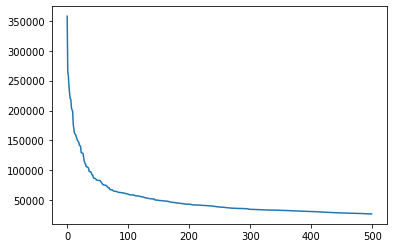

In [15]:
plt.plot(df['num_stars'])

In [19]:
df['languages'].value_counts()

JavaScript          111
Python               62
TypeScript           55
Go                   36
Java                 31
C++                  21
Shell                14
C                    13
Rust                 11
Ruby                 10
Kotlin                7
HTML                  6
PHP                   6
CSS                   5
C#                    5
Jupyter Notebook      5
Swift                 5
Vue                   4
Vim Script            4
Dart                  3
Clojure               2
Haskell               2
Markdown              2
TeX                   2
SCSS                  2
Scala                 1
V                     1
Objective-C           1
Lua                   1
Nunjucks              1
Makefile              1
Zig                   1
Julia                 1
Assembly              1
Dockerfile            1
Roff                  1
Name: languages, dtype: int64

In [25]:
mock_repo = raw[0]
mock_repo

{'id': 28457823,
 'node_id': 'MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==',
 'name': 'freeCodeCamp',
 'full_name': 'freeCodeCamp/freeCodeCamp',
 'private': False,
 'owner': {'login': 'freeCodeCamp',
  'id': 9892522,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjk4OTI1MjI=',
  'avatar_url': 'https://avatars.githubusercontent.com/u/9892522?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/freeCodeCamp',
  'html_url': 'https://github.com/freeCodeCamp',
  'followers_url': 'https://api.github.com/users/freeCodeCamp/followers',
  'following_url': 'https://api.github.com/users/freeCodeCamp/following{/other_user}',
  'gists_url': 'https://api.github.com/users/freeCodeCamp/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/freeCodeCamp/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/freeCodeCamp/subscriptions',
  'organizations_url': 'https://api.github.com/users/freeCodeCamp/orgs',
  'repos_url': 'https://api.github.com/users/freeCodeCamp/repos',
  'event

In [35]:
df.to_csv('500_repos.csv')

In [37]:
pickle.dump(raw, 'raw.pkl')

TypeError: file must have a 'write' attribute